<a href="https://colab.research.google.com/github/kirubanath/ML-DS_learnings/blob/main/ML_Basics3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Q1 K-Means

Implement K-Means Clustering on the dataset at the following location :  https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

You are expected to do all necessary EDA, feature scaling and transforms.

First, arbitarily choose cluster value as 2. Then use the elbow method which was discussed in class to identify the best number of cluster. While exploring this, if you observe the need to consider inertia as a factor, do so with proper rationale.

Write a bried explanation as to how PCA can help with clustering in this example.

In [ ]:
#loading the data:
data = pd.read_csv("https://raw.githubusercontent.com/kirubanath/Datasets/main/Facebook_live.csv")
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
#removing useless columns
data.drop(columns=['Column1','Column2','Column3','Column4'], inplace= True)
data.head()

#for later:
clustered_data = data.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


For clustering categorical variable, Kmeans does not work well. We have to use Kmodes or Kprototype algorithms. So we remove the categorical variable status type for now.

References: <br>
1. Clustering categorical data : https://towardsdatascience.com/clustering-algorithm-for-data-with-mixed-categorical-and-numerical-features-d4e3a48066a0 <br>
2. Using Gower distance        : https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b <br>
3. mixed variables data set :https://towardsdatascience.com/clustering-datasets-having-both-numerical-and-categorical-variables-ed91cdca0677


But we can still incorporate the data using one hot encoding. Again this may not be the best method. Better way to handle this would be to use Kproto or __DBSCAN__ or Spectral clustering


In [ ]:
data = pd.get_dummies(data, columns=['status_type'])

In [ ]:
#first convert the time into datetimeindex
data.status_published = pd.to_datetime(data.status_published)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   status_id           7050 non-null   int64         
 1   status_published    7050 non-null   datetime64[ns]
 2   num_reactions       7050 non-null   int64         
 3   num_comments        7050 non-null   int64         
 4   num_shares          7050 non-null   int64         
 5   num_likes           7050 non-null   int64         
 6   num_loves           7050 non-null   int64         
 7   num_wows            7050 non-null   int64         
 8   num_hahas           7050 non-null   int64         
 9   num_sads            7050 non-null   int64         
 10  num_angrys          7050 non-null   int64         
 11  status_type_link    7050 non-null   uint8         
 12  status_type_photo   7050 non-null   uint8         
 13  status_type_status  7050 non-null   uint8       

**Handling the time data:**<br>
The reactions may depend on the time in three ways:

1. Time of the day it was published --> most probable since the time of the day reflects if people are free or not
2. month of the year                --> some months maybe holidays/winter and people maybe indoors?
3. Year                             --> if the year was an odd one like during covid then maybe but these three years were fairly normal

So we can either add the time data as a categorical variable (eg: aggregating the data wrt the time of the day like morning , afternoon...or month like jan, feb ...so on) or we can use dynamic time wrapping to effectively find the distance between two time series data and use it as the distance function in Kmeans.

**References**
1. Using Dynamic time wrapping : https://towardsdatascience.com/how-to-apply-k-means-clustering-to-time-series-data-28d04a8f7da3 <br>
dynamic time wrapping finds the similarities between two time series better than eucleadean distance
2. Kaggle thread on handling time: https://www.kaggle.com/questions-and-answers/40494
3. Handling time in pandas: https://www.youtube.com/watch?v=J73mvgG9fFs&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=36
4. handling time in pandas2: https://www.youtube.com/watch?v=UFuo7EHI8zc
5. Time series Clustering: https://colab.research.google.com/drive/1usNfL_8UUd15kz1oCeXlhz61CwcvOZxX?usp=sharing



For this question I am converting the time data into time of the day : morning,evening and night. Then one hot encode them.

A better approach would definitely be DTW but I am still very confused as to how to create the distance function. So for now using the above.

In [ ]:
#creating a new column of just time of the day:
data['time'] = data.status_published.dt.hour
data['Morning'] = np.where(((data.time>=6)&(data.time<=13)), 1,0)
data['Evening'] = np.where(((data.time>=14)&(data.time<=21)), 1,0)
data['Night'] = np.where(((data.time>=22)&(data.time<=5)), 1,0)

No we dont need the status_published and the time column

In [ ]:
data.drop(columns = ['status_published','time'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   status_id           7050 non-null   int64
 1   num_reactions       7050 non-null   int64
 2   num_comments        7050 non-null   int64
 3   num_shares          7050 non-null   int64
 4   num_likes           7050 non-null   int64
 5   num_loves           7050 non-null   int64
 6   num_wows            7050 non-null   int64
 7   num_hahas           7050 non-null   int64
 8   num_sads            7050 non-null   int64
 9   num_angrys          7050 non-null   int64
 10  status_type_link    7050 non-null   uint8
 11  status_type_photo   7050 non-null   uint8
 12  status_type_status  7050 non-null   uint8
 13  status_type_video   7050 non-null   uint8
 14  Morning             7050 non-null   int32
 15  Evening             7050 non-null   int32
 16  Night               7050 non-null   int32


Here since the dimension of the data is larger we could first reduce the dimension and then do the clustering.

For dimension reduction we can either use PCA or LDA. In general we use LDA for labelled data(supervised) and PCA for unsupervised. Since this is an unsupervised case we will use PCA. 

**LDA is better than PCA when there is noise in the data! and it is used for classification**
 
For applying PCA it is better to calculate the principal components seperately for each of the one hot encoded variables and seperately for other data and finally combine all of them.

Finally to select the number of principal components to use, we will take help of the explained variance of the principal components. (In general we try to get atleast 90%).

In [ ]:
#deviding the data into purely numeric and then the two one hot encoded variables
#this is to calculate the PCA
data_numeric = data.iloc[:,1:10]
data_status  = data.iloc[:,10:14]
data_time    = data.iloc[:,14:]

Also for the data above, normalization makes sense. So let us first normalize the data:

In [ ]:
norm = MinMaxScaler()
columns = data_numeric.columns
data_numeric = norm.fit_transform(data_numeric)
data_numeric = pd.DataFrame(data_numeric, columns=columns)
data_numeric.head()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [ ]:
data_numeric

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


Selecting the best value for number of principal components:

In [ ]:
pcas = [PCA(n_components=i) for i in range(0,9)]
datas = [pcas[i].fit_transform(data_numeric) for i in range(0,8)]
scores = [np.sum(pcas[i].explained_variance_ratio_) for i in range(0,8)]

Text(0.5, 0, 'Number of principal components')

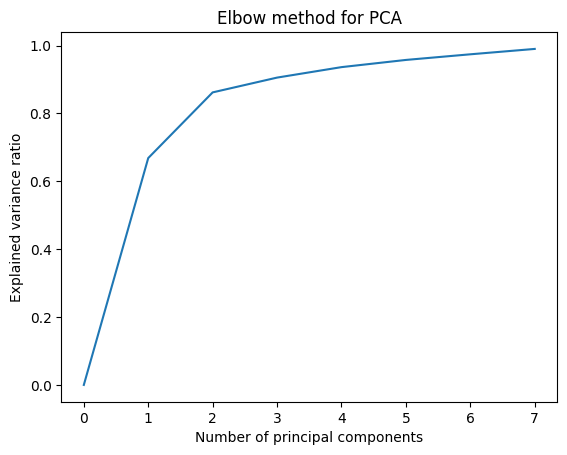

In [ ]:
plt.plot(scores)
plt.title('Elbow method for PCA')
plt.ylabel('Explained variance ratio')
plt.xlabel('Number of principal components')

Better way to do this is to get the scores(explained variance ratio) for each possible number of components and then take the score/number of component that is just below the 90 percentile.

For now from the above graph we can see that we get an elbow approximately at 2. we can take either 2 or 3 here. I will take 3.

In [ ]:
pca_numeric = PCA(n_components=3)
data_numeric_redux = pca_numeric.fit_transform(data_numeric)

PCA for the remaining two categorical columns: the ones which were one hot encoded

In [ ]:
#pca_time:
pca_time = PCA(n_components=1)
data_time_redux = pca_time.fit_transform(data_time)

pca_status = PCA(n_components=1)
data_status_redux = pca_time.fit_transform(data_status)

In [ ]:
data_reduced = np.concatenate([data_numeric_redux,data_status_redux,data_time_redux],axis=1)

In [ ]:
data_reduced = pd.DataFrame(data_reduced)
data_reduced.head()

,0,1,2,3,4
0,0.102166,0.108707,-0.024445,0.899944,0.587471
1,-0.026744,-0.021502,-0.001840,-0.513292,-0.409560
2,0.000206,0.011211,-0.004789,0.899944,0.587471
3,-0.038197,-0.019096,-0.002186,-0.513292,-0.409560
4,-0.007369,-0.015080,-0.006273,-0.513292,-0.409560


Now to perform the Kmeans clustering, we have to first select the optimal number of clusters. This is again done by elbow method and looking at the inertia( intertia is the sum of the squared distances between the data points and the centroid of their cluster). 

Naturally as the number of cluster increases, inertia decreases and when the number of datapoints and the number of clusters are same the inertia is 0

In [ ]:
n_clusters = range(2,20)
kmeans = [KMeans(n_clusters=i).fit(data_reduced) for i in n_clusters]
inertia = [kmeans[i].inertia_ for i in range(len(kmeans))]

C:\Users\kirub\AppData\Local\Temp\ipykernel_19024\2029449372.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(2,20));


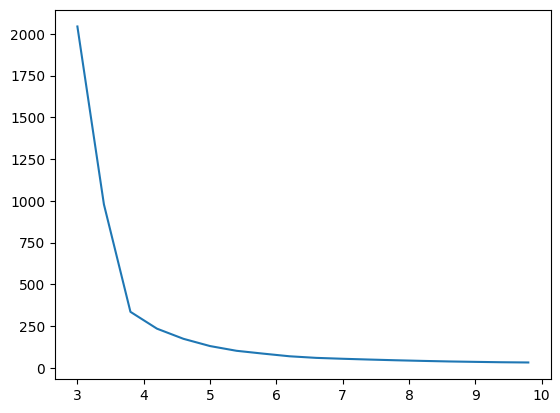

In [ ]:

fig, ax = plt.subplots() 
ax.plot(inertia)
ax.set_xticklabels(np.arange(2,20));

As we can see above, the elbow point is between  3 and 4. Let us take the number of clusters as 4

In [ ]:
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(data_reduced)

In [ ]:
labels.shape

(7050,)

Add the lables to the original data and display:

In [ ]:
clustered_data['cluster_id'] = labels
clustered_data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_id
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,1
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,1


In [ ]:
clustered_data.cluster_id.unique()

array([0, 1, 3, 2])

As we can see above the entire data has been clustered into 4 clusters --> [0,1,2,3]

**Note:**

A better way of encoding might be label encoding rather than one hot! -- > anyway we are doing the same thing here by first one hot and then PCA, which is same as label encoding and scaling!

## Q2 Loss Functions

Let the desired output to 10 inputs be,

> [0,1,0,0,1,0,0,1,1,1]


and let the corresponding actual output obtained from a machine be 


> [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


Find programmatically or by hand the loss obtained from using:

1.   a symmetric 0 − 1 loss function,

2.   the cross-entropy loss function and

3.   the hinge loss function.

If required assume a threshold of 0.5 to obtain a class from the machine output.  (sklearn by default uses 0.5 as threshold for binary classification) 

In [ ]:
Y_true = np.array([0,1,0,0,1,0,0,1,1,1])
Y_predicted = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

**Symmetric 0-1 loss function:** --> sklearn.metrix.zero_one_loss

we are returning number of misclassfication

In [ ]:
#thresholding for 0-1 loss:
Y_pred1 = np.where(Y_predicted < 0.5 , 0 , 1 )

#now loss for correct classification is 0 and loss for misclassification is 1:
loss1 = np.sum(Y_true == Y_pred1)

#printing the loss:
print(f'The total 0-1 loss is: {loss1}')
print(f'The average 0-1 loss is: {loss1/len(Y_true)}')
print(f'percentage of missclassification: {100*loss1/len(Y_true)}%')

The total 0-1 loss is: 5
The average 0-1 loss is: 0.5
percentage of missclassification: 50.0%


**Cross entropy loss function:** --sklearn.metrics.log_loss

$loss(y,p) = -(ylog(p)+ (1-y)log(1-p))$

In [ ]:
def cross_entropy(x,y):
    losses = [-1*(a*np.log(b) + (1-a)*np.log(1-b)) for a,b in zip(x,y)]
    return np.mean(losses)
loss2 = cross_entropy(Y_true,Y_predicted)

print(f'Cross Entropy Loss is: {loss2}')

Cross Entropy Loss is: 0.9162907318741551


**Hinge loss function:** --> we are returning average hinge loss --> sklearn.metrics.hinge_loss

(penalizes all misclassification)<br>
$hingeloss = max[0, 1 - y*f(x)]$

In [ ]:
#first convert both input and output to suitable scales:
# we have to scale the features from (0,1) t0 (-1,1)
def normalization(value,max_n=1,min_n=-1,max=1,min=0):
    """
    max,min     --> old range
    max_n,min_n --> new range
    """
    a = (max_n - min_n)/(max-min)
    b = (max) - a*max
    
    return a*value + b

def hinge_loss(x,y):
    losses = [max(0,1.0-a*b) for a,b in zip(x,y)]
    return np.sum(losses), np.mean(losses)
    

#transforming input:
Y_true_hinge = np.apply_along_axis(normalization,0,Y_true)
Y_pred_hinge = np.apply_along_axis(normalization,0,Y_predicted)

loss3 = hinge_loss(Y_true_hinge,Y_pred_hinge)

print(f'Total hinge loss is: {loss3[0]}') 
print(f'Average hinge loss is: {loss3[1]}')

Total hinge loss is: 10.0
Average hinge loss is: 1.0
